Loading the dataset

In [2]:
import pandas as pd

# Load movies and ratings data
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')

# Display the first few rows of each dataframe
print(movies.head())
print(ratings.head())


   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
   userId  movieId  rating  timestamp
0       1        1     4.0  964982703
1       1        3     4.0  964981247
2       1        6     4.0  964982224
3       1       47     5.0  964983815
4       1       50     5.0  964982931


Data cleaning and preparation

In [3]:
# Merge movies and ratings on movieId
movie_ratings = pd.merge(ratings, movies, on='movieId')

In [4]:
# Display the first few rows of the merged dataframe
print(movie_ratings.head())

   userId  movieId  rating  timestamp                        title  \
0       1        1     4.0  964982703             Toy Story (1995)   
1       1        3     4.0  964981247      Grumpier Old Men (1995)   
2       1        6     4.0  964982224                  Heat (1995)   
3       1       47     5.0  964983815  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0  964982931   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


In [5]:
# Check for missing values
print(movie_ratings.isnull().sum())

userId       0
movieId      0
rating       0
timestamp    0
title        0
genres       0
dtype: int64


In [6]:
# Drop duplicates if any
movie_ratings.drop_duplicates(inplace=True)

In [7]:
# Extract useful features
movie_ratings = movie_ratings[['userId', 'movieId', 'rating', 'title', 'genres']]

In [8]:
# Display the first few rows of the cleaned dataframe
print(movie_ratings.head())

   userId  movieId  rating                        title  \
0       1        1     4.0             Toy Story (1995)   
1       1        3     4.0      Grumpier Old Men (1995)   
2       1        6     4.0                  Heat (1995)   
3       1       47     5.0  Seven (a.k.a. Se7en) (1995)   
4       1       50     5.0   Usual Suspects, The (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                               Comedy|Romance  
2                        Action|Crime|Thriller  
3                             Mystery|Thriller  
4                       Crime|Mystery|Thriller  


Exploratory Data Analysis (EDA)

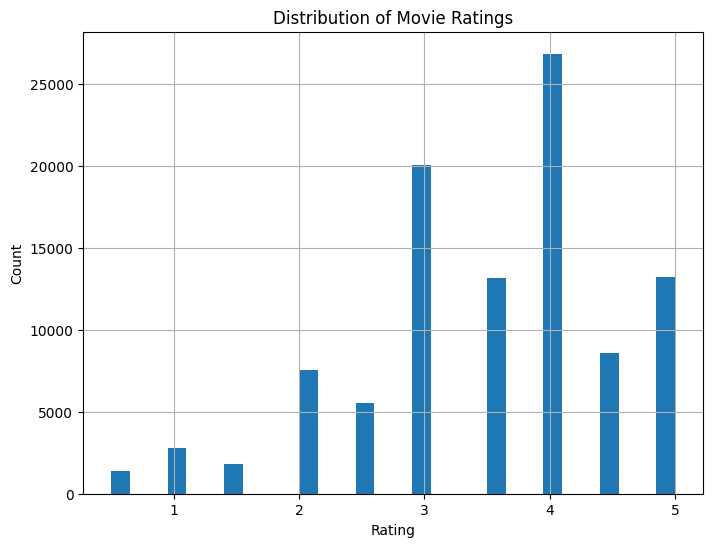

In [9]:
# Analyzing rating distribution

import matplotlib.pyplot as plt

# Plot the distribution of ratings
plt.figure(figsize=(8, 6))
movie_ratings['rating'].hist(bins=30)
plt.title('Distribution of Movie Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()


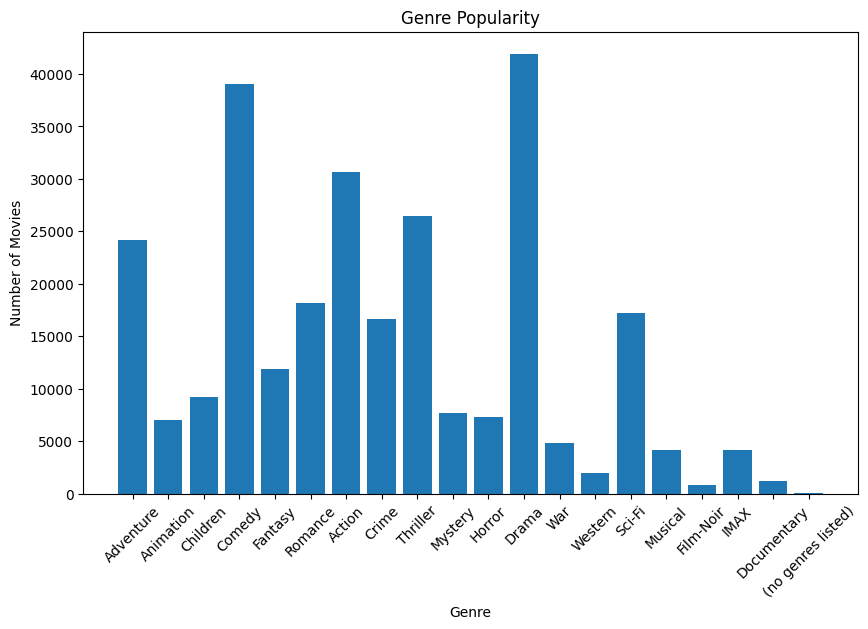

In [10]:
# Analyzing genre popularity

from collections import Counter
from itertools import chain

# Split genres and count the occurrences of each genre
genres_split = movie_ratings['genres'].str.split('|')
genre_count = Counter(chain.from_iterable(genres_split))

# Plot the most common genres
plt.figure(figsize=(10, 6))
plt.bar(genre_count.keys(), genre_count.values())
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.show()

